<a href="https://colab.research.google.com/github/0ShNa0/DatasetNN/blob/main/NN_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/final_data2.csv")
print(df)

     Unnamed: 0                                           Original  \
0             0  They were encouraged to dress in bright colors...   
1             1  They were encouraged to dress in bright colors...   
2             2  They were encouraged to dress in bright colors...   
3             3  Buttigieg’s performance in Ohio was not his st...   
4             4  Buttigieg’s performance in Ohio was not his st...   
..          ...                                                ...   
865         865  The two were buried together in one coffin, in...   
866         866  The two were buried together in one coffin, in...   
867         867  The two were buried together in one coffin, in...   
868         868  The two were buried together in one coffin, in...   
869         869  The two were buried together in one coffin, in...   

                                           Paraphrases  
0    Bright clothing and accessories, such as flowe...  
1    To dress in bright colors, they were urg

In [3]:
column_list=df['Paraphrases'].tolist()

In [4]:
preproc_data=[]
import re
for sentence in column_list:
  numbers=re.findall('[0-9]+', sentence)
  if(len(numbers)>0):
    preproc_data.append([sentence,numbers])
    print(numbers)



['5', '2017']
['26', '2017', '5', '2017', '2017']
['26', '2017', '2017']
['26', '2017', '5', '2017']
['26', '2017', '5', '2017']
['26', '2017', '5', '2017', '2017', '2017']
['26', '2017', '28', '2017', '5', '8']
['26', '2017', '5', '2017']
['26', '2017', '5', '2017', '2017', '2017']
['26', '2017', '28', '2017', '2017', '2017', '2017']
['2010', '2021']
['2010', '2021']
['11', '2010']
['2010', '2021']
['90']
['90']
['90']
['90']
['90']
['90']
['90']
['90']
['90']
['90']
['1984']
['1984']
['1984']
['1990']
['1990']
['2', '000']
['2', '000']
['2', '000']
['2', '000']
['2', '000']
['2', '000']
['1880']
['1840']
['1786']
['1786']
['1786']
['1', '2']
['2017']
['2017']
['2017']
['2017']
['12', '5', '4']
['12', '5', '4']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['0']
['3', '22']
['22']
['22']
['22']
['22']
['22']
['22']
['23']
['2']
['2']
['13', '1998']
['13', '1998']
['13', '1998']
['13', '1998']
['13', '1998']
['1998', '13', '1998']
['2024']
['2024']
['2024']
['2024', '2026']
['2024']


In [46]:
import random
proc_data=[]
for data in preproc_data:
  for num in data[1]:
    if(int(num)==0 and len(num)>1):
      newnum=random.randint(pow(10,len(num)),pow(10,len(num))*10-1)
    if(int(num)>=0 and int(num)<=9):
      newnum=random.randint(1,9)
    elif(int(num)>=10 and int(num)<=30):
      newnum=random.randint(10,30)
    elif(int(num)>=30 and int(num)<=99):
      newnum=random.randint(30,99)
    elif(int(num)>=100 and int(num)<=999):
      newnum=random.randint(10,99)
    elif(int(num)>=1000 and int(num)<=2024):
      newnum=random.randint(1500,2023)
    elif(int(num)>=2025 and int(num)<=9999):
      newnum=random.randint(1000,9999)
    elif(int(num)>=10000):
      newnum=random.randint(10000,10*int(num))
    new_str = data[0].replace(num, str(newnum))
    proc_data.append([data[0],new_str])



In [36]:
for data in proc_data:
  print(data)

['In connection with an alleged plot to attack the World Cup in Russia, five young men from Chechnya were arrested and charged with terrorism offenses. They were sentenced to five years and eight years in prison on July 5, 2017.', 'In connection with an alleged plot to attack the World Cup in Russia, five young men from Chechnya were arrested and charged with terrorism offenses. They were sentenced to five years and eight years in prison on July 2, 2017.']
['In connection with an alleged plot to attack the World Cup in Russia, five young men from Chechnya were arrested and charged with terrorism offenses. They were sentenced to five years and eight years in prison on July 5, 2017.', 'In connection with an alleged plot to attack the World Cup in Russia, five young men from Chechnya were arrested and charged with terrorism offenses. They were sentenced to five years and eight years in prison on July 5, 1661.']
['On June 26, 2017, five young men from Chechnya were arrested and charged wit

In [37]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

tokenizer = AutoTokenizer.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base")

model = AutoModelForSeq2SeqLM.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base").to(device)

def paraphrase(
    question,
    num_beams=4,
    num_beam_groups=4,
    num_return_sequences=1,
    repetition_penalty=10.0,
    diversity_penalty=3.0,
    no_repeat_ngram_size=2,
    temperature=0.7,
    max_length=128
):
    input_ids = tokenizer(
        f'paraphrase: {question}',
        return_tensors="pt", padding="longest",
        max_length=max_length,
        truncation=True,
    ).input_ids

    outputs = model.generate(
        input_ids, temperature=temperature, repetition_penalty=repetition_penalty,
        num_return_sequences=num_return_sequences, no_repeat_ngram_size=no_repeat_ngram_size,
        num_beams=num_beams, num_beam_groups=num_beam_groups,
        max_length=max_length, diversity_penalty=diversity_penalty
    )

    res = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    return res

In [38]:
tolabel=[]
for s in proc_data:
  changed=paraphrase(s[1])
  tolabel.append([s[0],changed])

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [39]:
for data in tolabel:
  print(data)

['In connection with an alleged plot to attack the World Cup in Russia, five young men from Chechnya were arrested and charged with terrorism offenses. They were sentenced to five years and eight years in prison on July 5, 2017.', ['On July 2, 2017, five young men from Chechnya were arrested and charged with terrorism offenses in connection with an alleged plot to stage the World Cup in Russia.']]
['In connection with an alleged plot to attack the World Cup in Russia, five young men from Chechnya were arrested and charged with terrorism offenses. They were sentenced to five years and eight years in prison on July 5, 2017.', ['Five young men from Chechnya were arrested and charged with terrorism offenses in connection with an attack on the World Cup in Russia. They were sentenced to five years and eight years in prison on July 5, 1661.']]
['On June 26, 2017, five young men from Chechnya were arrested and charged with terrorism offenses related to an alleged conspiracy to attack the Worl

In [40]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

def check_entailment(query, text):
  tokenizer = RobertaTokenizer.from_pretrained('roberta-large-mnli')
  model = RobertaForSequenceClassification.from_pretrained('roberta-large-mnli')
  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  inputs = tokenizer.encode_plus(query, text, add_special_tokens=True, padding='longest', truncation=True, return_tensors='pt')
  input_ids = inputs['input_ids']
  attention_mask = inputs['attention_mask']
  with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    entailment_score = probabilities[:, 1].item()

  return entailment_score

In [41]:

labelled_data=[]
for data in tolabel:
  score=check_entailment(data[0],data[1])
  labelled_data.append([data[0],data[1],score])

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another tas

In [42]:

col3data=[]
for data in labelled_data:
  col3data.append(data[2])
print(col3data)
import numpy as np
p75 = np.percentile(col3data, 75)
p25 = np.percentile(col3data, 25)
p50 = np.percentile(col3data, 50)
labels=['refute','neutral''support']
getlabels=['refute' if score <= p25 else 'neutral' if score >=p25 and score <= p75  else 'support' for score in col3data]
print(getlabels)

[0.26900938153266907, 0.26900938153266907, 0.2727411091327667, 0.2727411091327667, 0.2727411091327667, 0.2727411091327667, 0.2727411091327667, 0.27408096194267273, 0.27408096194267273, 0.27408096194267273, 0.06379009783267975, 0.06379009783267975, 0.06379009783267975, 0.06379009783267975, 0.2661164700984955, 0.2661164700984955, 0.2661164700984955, 0.2661164700984955, 0.24535466730594635, 0.24535466730594635, 0.24535466730594635, 0.24535466730594635, 0.24535466730594635, 0.24535466730594635, 0.45092129707336426, 0.45092129707336426, 0.45092129707336426, 0.45092129707336426, 0.45092129707336426, 0.45092129707336426, 0.24244166910648346, 0.24244166910648346, 0.24244166910648346, 0.24244166910648346, 0.2861681580543518, 0.2861681580543518, 0.2861681580543518, 0.2861681580543518, 0.2861681580543518, 0.2861681580543518, 0.20270635187625885, 0.20270635187625885, 0.20270635187625885, 0.20270635187625885, 0.20270635187625885, 0.20270635187625885, 0.20270635187625885, 0.29326769709587097, 0.2932

In [43]:

final_labelled=[]
for data,tag in zip(labelled_data,getlabels):
  final_labelled.append([data[0],data[1],tag])

csv_file="NN_labelled.csv"
import pandas as pd
df = pd.DataFrame((final_labelled), columns=["Sentence", "Comparison","Score"])
print(df)
import csv

custom_header = ["Sentence", "Comparison","Score"]
df.columns = custom_header


df.to_csv(csv_file, index=True)

                                             Sentence  \
0   In connection with an alleged plot to attack t...   
1   In connection with an alleged plot to attack t...   
2   On June 26, 2017, five young men from Chechnya...   
3   On June 26, 2017, five young men from Chechnya...   
4   On June 26, 2017, five young men from Chechnya...   
..                                                ...   
66  From 1984 to present the NBA Slam Dunk Contest...   
67  In addition to other events, the NBA has organ...   
68  Part of a collection of balloon animals, the a...   
69  In the 1990s, a series of balloon animals was ...   
70  Over 2,000 jobs are projected to be created at...   

                                           Comparison    Score  
0   [On July 2, 2017, five young men from Chechnya...  neutral  
1   [Five young men from Chechnya were arrested an...  neutral  
2   [The Supreme Court of Russia deemed the convic...  neutral  
3   [Five young men from Chechnya were arrested an...  

In [44]:


from google.colab import files

csv_file_name = "NN_labelled.csv"

files.download(csv_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

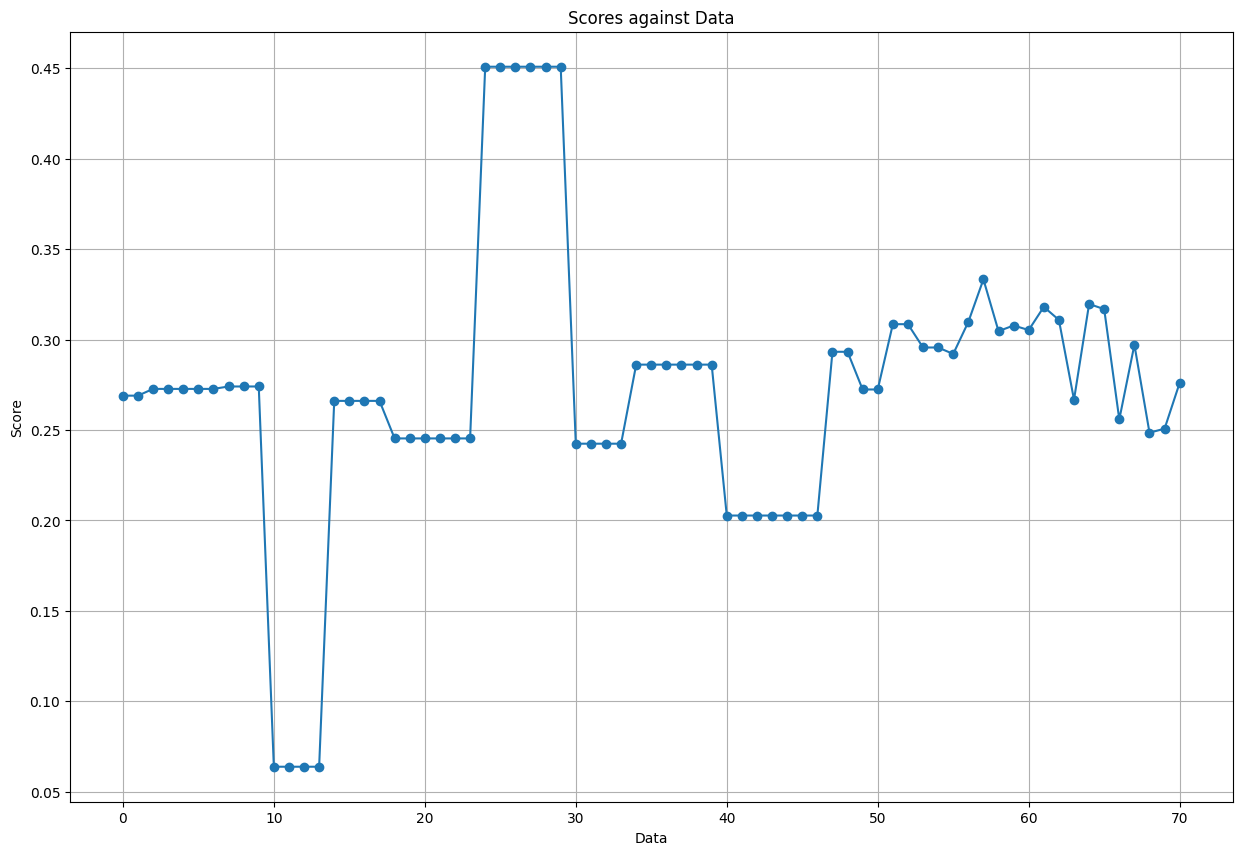

In [45]:

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(col3data))
plt.figure(figsize=(15,10))
plt.plot(x, col3data, marker='o', linestyle='-')

plt.title('Scores against Data')
plt.xlabel('Data')
plt.ylabel('Score')

plt.grid(True)
plt.show()

